In [1]:
import pandas as pd
import numpy as np
#numpy-1.21.4
import CDSOM
import newSom
import dataset_read
import researchpy as rp
import scipy.stats as stats
import matplotlib.pyplot as plt
import collections
import warnings
import experiment
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

C:\Users\fooli\anaconda3\envs\gpu_env\lib\site-packages\scipy\__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataread = dataset_read.DATAREAD()

In [3]:
csv = pd.read_csv("Hotel Reservations.csv")
csv = csv.drop(columns=['Booking_ID'])
csv = csv.sample(int(csv.shape[0]*0.01))


dataread.label_encoding(csv,"type_of_meal_plan")
dataread.label_encoding(csv,"room_type_reserved")
dataread.label_encoding(csv,"arrival_year")
dataread.label_encoding(csv,"market_segment_type")
dataread.label_encoding(csv,"booking_status")


csv_test = csv.sample(int(csv.shape[0]*0.3))
csv_training = csv.drop(csv_test.index,axis = 0)


dataread.initializedataset(csv,csv_training,csv_test,"booking_status")




self.continuous_feature_num 3
self.data_discrete_indexes ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_year', 'arrival_month', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'no_of_special_requests'] 


Neuron/Cluster number: 2
accuracy_score_orignial 0.6759259259259259
recall_score_original 0.6093073593073592
precision_score_original 0.679183914843288
f1_score_original 0.6002115282919092
accuracy_score_sog 0.6759259259259259
recall_score_sog 0.6093073593073592
precision_score_sog 0.679183914843288
f1_score_sog 0.6002115282919092
Neuron/Cluster number: 7
accuracy_score_orignial 0.6851851851851852
recall_score_original 0.6125541125541125
precision_score_original 0.7119565217391304
f1_score_original 0.5993016150152772
accuracy_score_sog 0.6759259259259259
recall_score_sog 0.6266233766233766
precision_score_sog 0.6604938271604939
f1_score_sog 0.6273291925465838
Not good accuracy result !!!!!
Not good precision_score_original !!!!!
Neuron/Cluster number: 12
accuracy_score_orignial 0.6851851851851852
recall_score_original 0.6125541125541125
precision_score_original 0.7119565217391304
f1_score_original 0.5993016150152772
accuracy_score_sog 0.6851851851851852
recall_score_sog 0.6125541125541

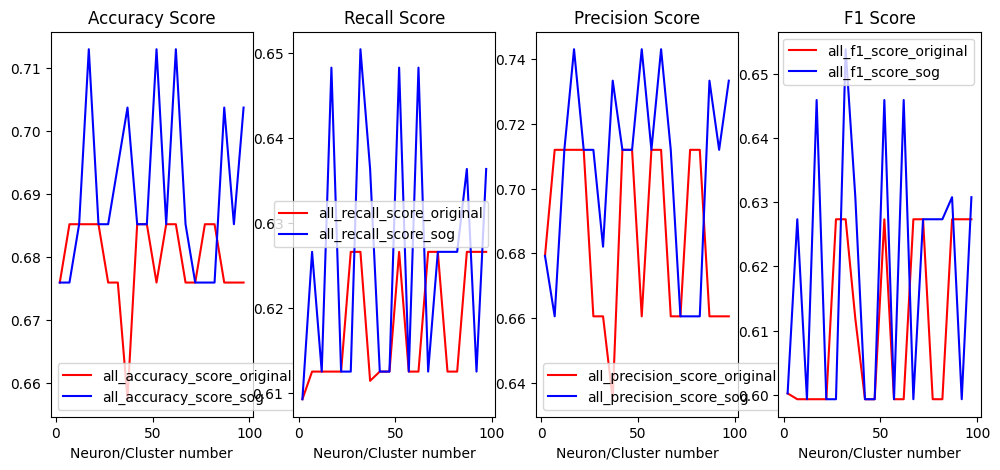

Accuracy Score T-Test
                      Variable     N      Mean        SD        SE  95% Conf.  \
0  all_accuracy_score_original  20.0  0.679630  0.006981  0.001561   0.676362   
1       all_accuracy_score_sog  20.0  0.690278  0.013257  0.002964   0.684073   
2                     combined  40.0  0.684954  0.011766  0.001860   0.681191   

   Interval  
0  0.682897  
1  0.696482  
2  0.688717  
                                  Independent t-test  results
0  Difference (all_accuracy_score_original - all_...  -0.0106
1                              Degrees of freedom =   38.0000
2                                               t =   -3.1783
3                           Two side test p value =    0.0029
4                          Difference < 0 p value =    0.0015
5                          Difference > 0 p value =    0.9985
6                                       Cohen's d =   -1.0051
7                                       Hedge's g =   -0.9851
8                                  Glas

In [4]:
#RandomFOrest
import experiment
unstable_repeat_num= 30
scope_num = 100
class_num = 2
best_num = 48
interval = 5
features_chosen = [1,2,3,4,5,6,7,8,9,10,11,12,13]
feature_combination_number = 2
experiment = experiment.Experiment()
experiment.UTtest_Discrete(dataread,class_num,scope_num,interval,features_chosen,feature_combination_number)

[[-2.29229918e-02 -6.33088608e-04  2.07335613e-02  1.32164623e-02
  -1.41517270e-02  4.24921742e-04 -5.98498480e-03 -6.84002903e-05
   1.62774615e-01 -4.58593805e-02  2.54579894e-02  9.26943431e-02
   9.79508609e-01  3.68399199e-02]
 [ 5.59430002e-03 -8.10304318e-03 -1.76681676e-02 -3.16919814e-02
   2.52336522e-02 -2.25709796e-03 -2.66468521e-02  3.30627942e-02
  -9.83817015e-01 -7.60338525e-03  5.83533257e-03  6.90619686e-03
   1.64649081e-01 -3.15700261e-02]
 [ 1.22186788e-01  2.39663603e-02  2.20266493e-01  9.38445303e-01
  -2.46864983e-02 -4.08830841e-03  5.69596988e-02  1.88328470e-02
  -4.19284793e-02  1.69848692e-01 -1.26875155e-02 -1.76843253e-03
  -4.39509119e-03  1.42421465e-01]
 [ 1.80763840e-01  7.62714637e-02  3.32563825e-01 -3.11666578e-01
  -6.10228303e-03  4.48950064e-03  3.51296055e-01  2.99346108e-02
  -2.59878720e-02  5.16822366e-01 -1.41455698e-02  5.56816047e-03
   9.25280928e-03  6.01092761e-01]
 [-1.98904111e-02  2.20383385e-02  5.07321843e-01 -5.46586368e-02
  

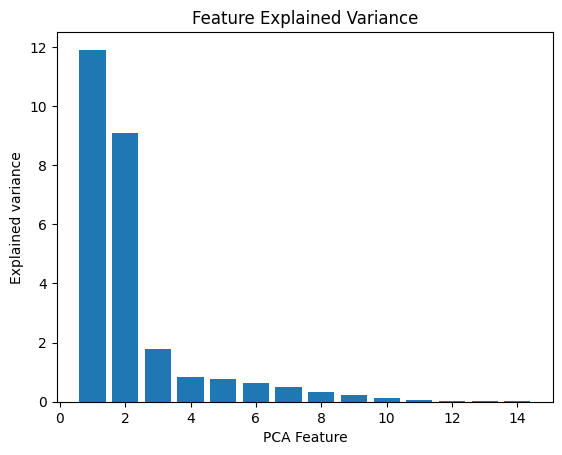

In [4]:
dataread.PCA_Comparision()  #12345  2, 3, 7, 8, 5, 6, 11, 9,|1, 4, 10, 5, 7, 6|4, 11, 9, 12, 13|4, 13, 10, 12|5, 3, 9, 11, 10, 13